# EDA  

In [10]:
import pandas as pd 
import numpy as np
import os 
import geopandas as gpd
import sys
from shapely.geometry import *
from fiona.crs import from_string
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

In [11]:
print("path: "+os.getcwd())
print(os.listdir())

path: D:\Python\kaggle\dacon_bus_inout
['.ipynb_checkpoints', 'bus_bts.csv', 'drive-download-20200214T141955Z-001.zip', 'intro_yg.ipynb', 'LSMD_ADM_SECT_UMD_50.dbf', 'LSMD_ADM_SECT_UMD_50.prj', 'LSMD_ADM_SECT_UMD_50.shp', 'LSMD_ADM_SECT_UMD_50.shx', 'LSMD_ADM_SECT_UMD_제주', 'LSMD_ADM_SECT_UMD_제주.zip', 'submission_sample.csv', 'test.csv', 'train.csv', '~$행정_법정동 중심좌표.xlsx', '국토도시_윈터스쿨(중급반).ipynb', '행정_법정동 중심좌표.xlsx']


In [12]:
# dir_ = ""
train = pd.read_csv("train.csv", dtype=str, encoding='utf-8')
test = pd.read_csv("test.csv", dtype=str, encoding='utf-8')
bus_bts = pd.read_csv("bus_bts.csv", dtype=str, encoding='utf-8')
bjd_wgd = pd.read_excel("행정_법정동 중심좌표.xlsx", dtype= str, sheet_name="합본 DB")
sub = pd.read_csv("submission_sample.csv", dtype=str, encoding='utf-8')

In [4]:
print("train :", len(train))
print("test :", len(test))
print("bus_bts :", len(bus_bts))
print("submission_sample :", len(sub))

train : 415423
test : 228170
bus_bts : 2409414
submission_sample : 228170


**train**

In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.4899,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508000000001,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.481809999999996,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.255790000000005,126.4126,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**test**

In [6]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.4899,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508000000001,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.481809999999996,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**bus_bts**

In [7]:
bus_bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1010010127894129.0,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1010010101730356.0,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1019160032727943.0,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1019150001770890.0,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1010010097237127.0,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [8]:
pd.DataFrame({'train':train.isnull().sum(),
              'test':test.isnull().sum()}).fillna('')

,train,test
10~11_ride,0,0
10~11_takeoff,0,0
11~12_ride,0,0
11~12_takeoff,0,0
18~20_ride,0,
6~7_ride,0,0
6~7_takeoff,0,0
7~8_ride,0,0
7~8_takeoff,0,0
8~9_ride,0,0


In [9]:
bus_bts.isnull().sum()

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

결측값은 bus_bts 데이터에만 존재 : 하차태그 안한 경우(895736, 약 37%), 정류장이름 없음(49)  

In [242]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'geometry'],
      dtype='object')

In [16]:
col_t = [str(j)+"~"+ str(j+1) + "_" + str(i) for i in ("ride","takeoff") for j in range(6,12)]
train['date'] = pd.to_datetime(train['date'])
train[col_t + ['18~20_ride']] = train[col_t + ['18~20_ride']].astype(float)
test['date'] = pd.to_datetime(test['date'])
test[col_t] = test[col_t].astype(float)
bus_bts['geton_datetime'] = pd.to_datetime(bus_bts['geton_date'] + ' ' + bus_bts['geton_time'])
bus_bts['user_category'] = bus_bts['user_category'].astype(float)
bus_bts['user_count'] = bus_bts['user_count'].astype(float)

타입변경

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


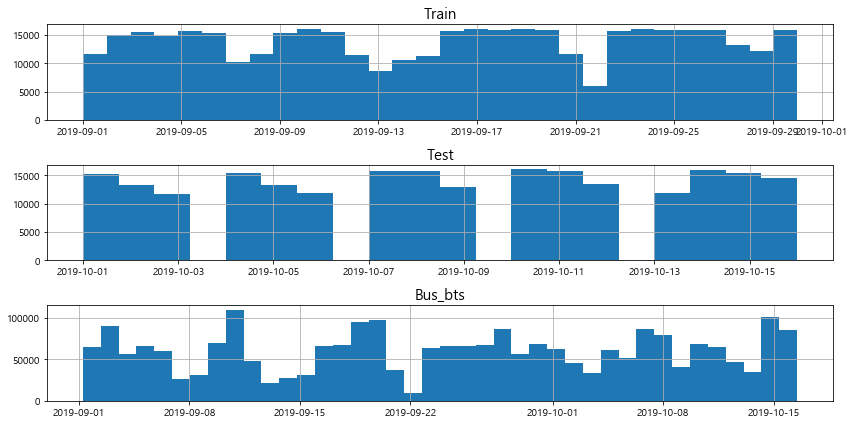

 - train : 2019-09-01 ~ 2019-09-30
 - test : 2019-10-01 ~ 2019-10-16
 - bus_bts : 2019-09-01 ~ 2019-10-16


In [17]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(3,1,1)
train['date'].hist(ax=ax1, bins = 30)
plt.title("Train", fontsize=15)
ax2 = plt.subplot(3,1,2)
plt.title("Test", fontsize=15)
test['date'].hist(ax=ax2, bins = 20)
ax3 = plt.subplot(3,1,3)
plt.title("Bus_bts", fontsize=15)
bus_bts['geton_datetime'].hist(ax=ax3, bins = 40)
plt.tight_layout()
plt.show()

print(" - train :" ,train['date'].dt.date.min(),"~",train['date'].dt.date.max())
print(" - test :" ,test['date'].dt.date.min(),"~",test['date'].dt.date.max())
print(" - bus_bts :" ,bus_bts['geton_datetime'].dt.date.min(),"~",bus_bts['geton_datetime'].dt.date.max())

> 평일과 주말에 버스 이용율 차이에 대한 패턴이 보인다.  
> 요일 변수(category) 또는 평일여부(dummy) 파생변수에 대한 고려가 필요해보임.  

In [18]:
train.describe().applymap(lambda x : round(x,3))

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000,415423.000
mean,0.306,0.830,0.815,0.642,0.600,0.579,0.113,0.345,0.516,0.431,0.408,0.403,1.242
std,1.110,2.255,2.318,1.960,1.886,1.942,0.598,1.279,1.659,1.485,1.413,1.446,4.722
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,85.000,94.000,136.000,78.000,124.000,99.000,45.000,66.000,59.000,65.000,52.000,81.000,272.000


In [19]:
bus_bts.describe().applymap(lambda x : round(x,3))

,user_category,user_count
count,2409414.000,2409414.000
mean,4.073,1.012
std,6.524,0.135
min,1.000,1.000
25%,1.000,1.000
50%,1.000,1.000
75%,6.000,1.000
max,30.000,10.000


In [20]:
train[(train['date']=='2019-09-04') & (train['bus_route_id']=='4270000')]['station_name'].duplicated().sum()

0

In [21]:
a = train[['station_code','station_name']].drop_duplicates().reset_index(drop=True)
cc = a['station_name'][a['station_name'].duplicated()].unique()

a[a['station_name'].isin(cc)].sort_values(by='station_name')

,station_code,station_name
2323,4212,(구)구판장
2899,4211,(구)구판장
728,2058,(구)중문동주민센터
753,2059,(구)중문동주민센터
1478,1952,(구)중앙파출소
...,...,...
780,1002,흥국사
1738,4200,흥덕사
2724,4199,흥덕사
1953,2585,희진주유소


In [22]:
len(train['bus_route_id'].unique())

613

In [23]:
train[['date','bus_route_id','latitude','longitude']].duplicated().sum() # 0

0

In [24]:
jeju_bjd = gpd.GeoDataFrame.from_file('LSMD_ADM_SECT_UMD_50.shp',encoding='cp949')
if jeju_bjd.crs is None:
    jeju_bjd.crs = epsg5179
else:
    jeju_bjd = jeju_bjd.to_crs(epsg4326)

In [25]:
bus_station = train[['station_code','station_name','latitude','longitude']].\
                drop_duplicates().\
                reset_index(drop=True).copy()
bus_station['latitude'] = bus_station['latitude'].astype(float)
bus_station['longitude'] = bus_station['longitude'].astype(float)
bus_station['geometry'] = bus_station.apply(lambda row : Point(row['longitude'], row['latitude']), axis=1)
bus_station = gpd.GeoDataFrame(bus_station, geometry='geometry')
bus_station.crs = epsg4326

bus_station_1 = bus_station[bus_station.within(jeju_bjd[jeju_bjd['EMD_NM'] != "추자면"].unary_union)]
bus_station_2 = bus_station[bus_station.within(jeju_bjd[jeju_bjd['EMD_NM'] == "추자면"].unary_union)]

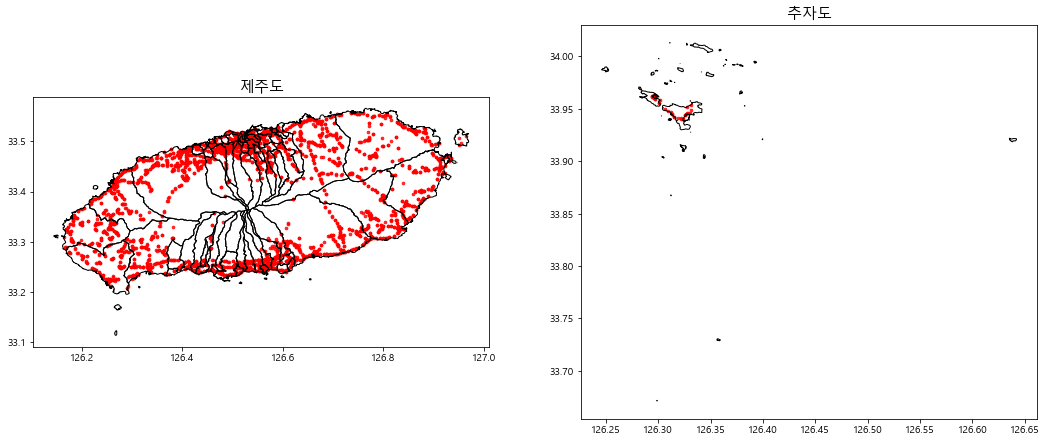

In [26]:
plt.figure(figsize=(18,18))
ax1 = plt.subplot(1,2,1)
jeju_bjd[jeju_bjd['EMD_NM'] != "추자면"].boundary.plot(linewidth=1,color='black', ax=ax1)
bus_station_1.plot(ax=ax1, color='red',markersize=7, alpha=.8)
plt.title("제주도", fontsize=15)
ax2 = plt.subplot(1,2,2)
jeju_bjd[jeju_bjd['EMD_NM'] == "추자면"].boundary.plot(linewidth=1,color='black',ax=ax2)
bus_station_2.plot(ax=ax2,color='red',markersize=7, alpha=.8)
plt.title("추자도", fontsize=15)
plt.show()

> 제주도는 주위에 섬들이 많이 있기 때문에, 고립된 정류장과 그렇지 않은 정류장을 구분해야할 필요가 있음  
> 특히 추자도, 그리고 제주도 주변의 작은 섬들  

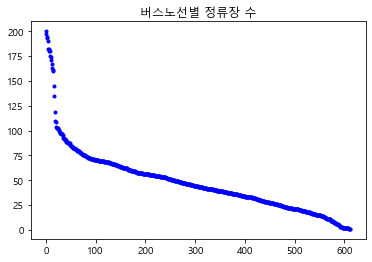

           cnt
count  613.000
mean    48.015
std     32.392
min      1.000
25%     26.000
50%     43.000
75%     63.000
max    200.000


In [27]:
bus_nosun = train.groupby(['bus_route_id'])['station_code'].unique().reset_index(name='station_list')
bus_nosun['station_list'] = bus_nosun['station_list'].apply(lambda x : x.tolist())
bus_nosun['cnt'] = bus_nosun['station_list'].apply(lambda x : len(x))
bus_nosun = bus_nosun.sort_values(by='cnt', ascending=False).reset_index(drop=True)
plt.title("버스노선별 정류장 수")
plt.plot(bus_nosun.index, bus_nosun['cnt'], "b.")
plt.show()

print(round(bus_nosun.describe(), 3))

9개정도 샘플만 노선 확인해보자.    

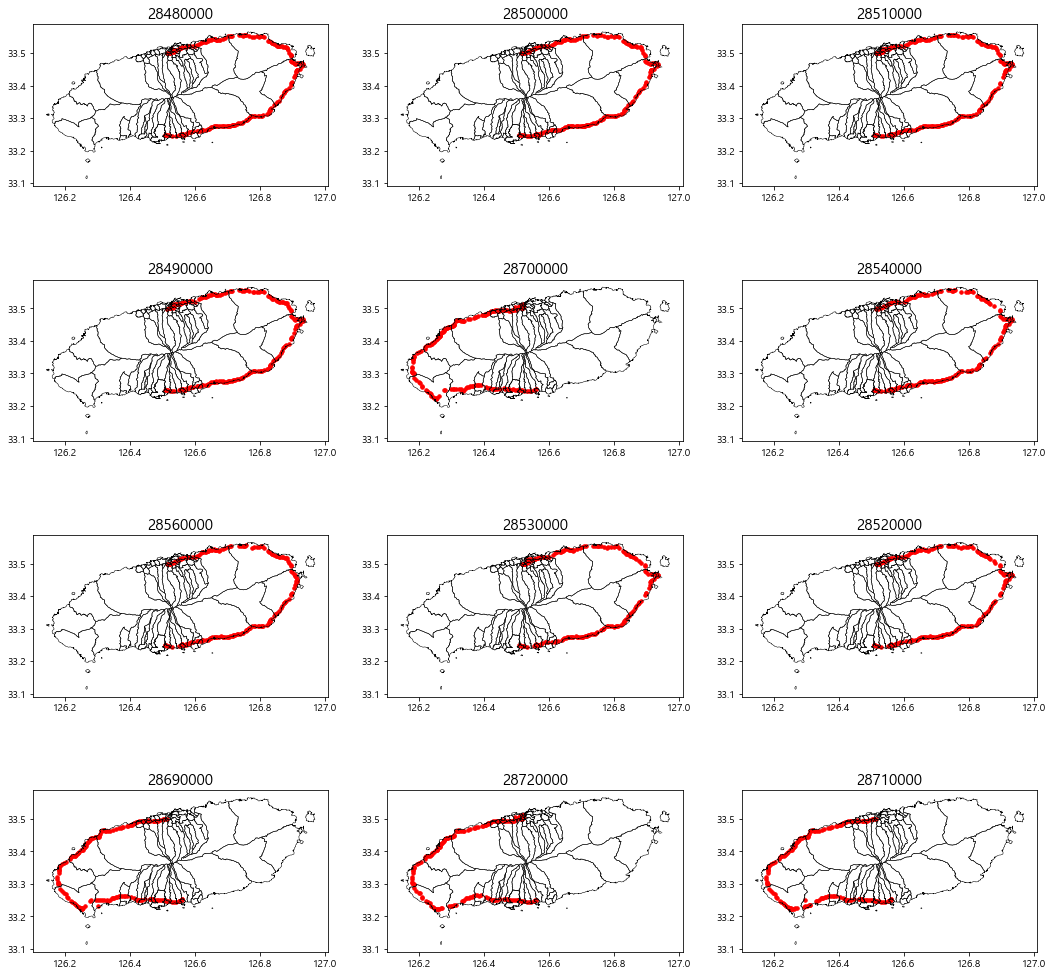

In [28]:
sample = bus_nosun.iloc[:12]

plt.figure(figsize=(18,18))
for route in range(len(sample)):
    sr = sample.iloc[route]
    sel_pt = bus_station[bus_station['station_code'].isin(sr['station_list'])]
    ax = plt.subplot(4,3,route+1)
    jeju_bjd[jeju_bjd['EMD_NM'] != "추자면"].boundary.plot(linewidth=0.5,color='black', ax=ax)
    sel_pt.plot(ax=ax, color='red',markersize=12, alpha=1)
    plt.title(sr['bus_route_id'], fontsize=15)
plt.show()

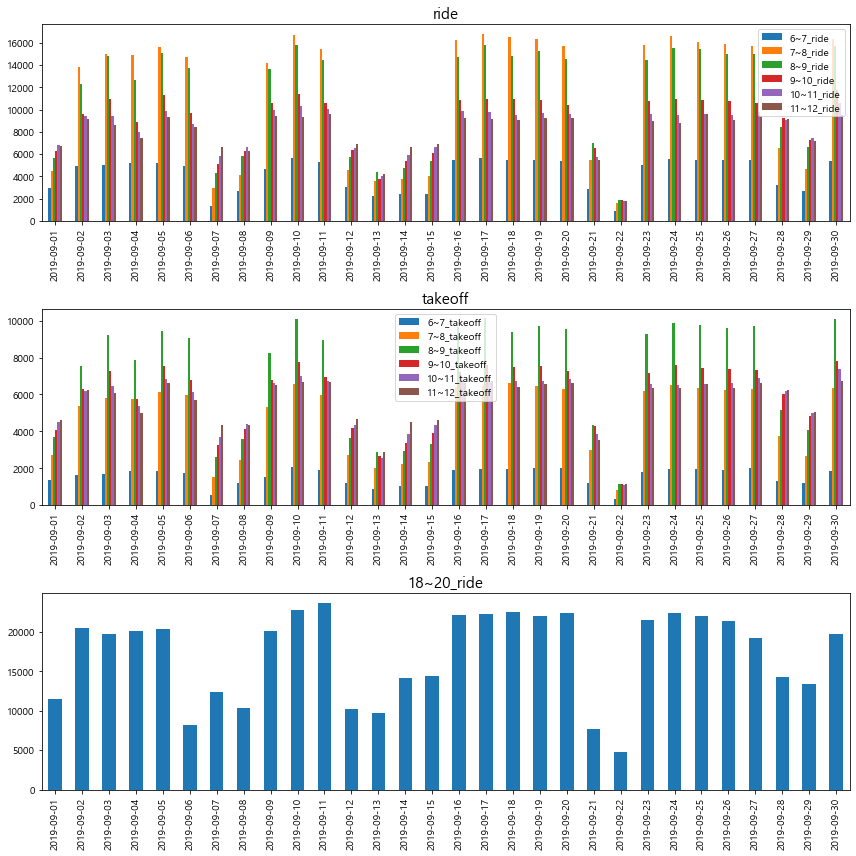

In [29]:
date_sum_ = train.groupby(['date'])[col_t + ['18~20_ride']].sum()
date_sum_.index = date_sum_.index.date

plt.figure(figsize=(12,12))
ax=plt.subplot(3,1,1)
date_sum_[date_sum_.columns[:6]].plot(kind='bar', ax=ax)
plt.title("ride", fontsize=15)
ax=plt.subplot(3,1,2)
date_sum_[date_sum_.columns[6:-1]].plot(kind='bar', ax=ax)
plt.title("takeoff", fontsize=15)
ax=plt.subplot(3,1,3)
date_sum_[date_sum_.columns[-1]].plot(kind='bar', ax=ax)
plt.title("18~20_ride", fontsize=15)

plt.tight_layout()
plt.show()

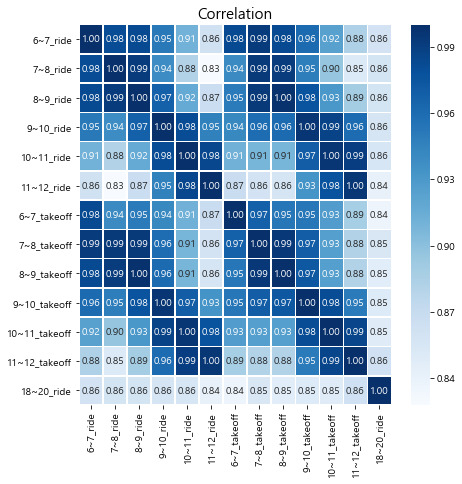

In [30]:
plt.figure(figsize=(7,7))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = date_sum_.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

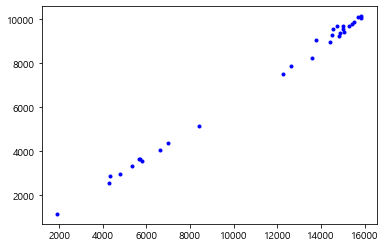

In [31]:
plt.plot(date_sum_['8~9_ride'], date_sum_['8~9_takeoff'], "b.")